# Diagonalisation et application

## Exercice

On considère la matrice 
$$M=\left[\begin{matrix}84 & -24 & -16 & -68 & -22\\-340 & 95 & 64 & 272 & 88\\-126 & 35 & 24 & 106 & 30\\151 & -42 & -29 & -121 & -39\\317 & -88 & -59 & -256 & -80\end{matrix}\right]$$
1. Montrer qu'elle est diagonalisable dans $\mathrm{M}_5(\mathbb{C})$ en utlisant son polynôme caractéristique (`M.charpoly(X)`).
1. En utilisant la fonction `M.eigenvects()`, construire une matrice $P\in\mathrm{GL}_5(\mathbb{C})$ telle que
$$P^{-1}\cdot M\cdot P\in\mathrm{D}_5(\mathbb{C})$$
1. Retrouver le résultat avec la fonction `M.diagonalize()`.

In [1]:
import sympy as sp
sp.init_printing()

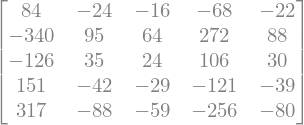

In [2]:
M = sp.Matrix([[84, -24, -16, -68, -22], [-340, 95, 64, 272, 88], [-126,
              35, 24, 106, 30], [151, -42, -29, -121, -39], [317, -88, -59, -256, -80]])
M

**Question 1**

In [3]:
X = sp.symbols('X')
(M-X*sp.eye(5)).det().factor()

Le polynôme caractéristique est scindé dans $\mathbb{C}[X]$ et toutes ses racines sont simples (de multiplicité 1), la matrice est donc diagonalisable.

**Question 2**

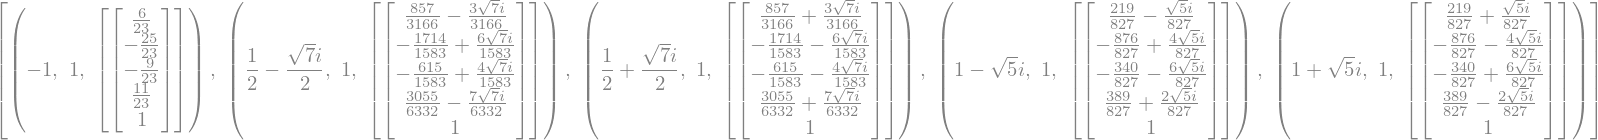

In [4]:
res = M.eigenvects()
res

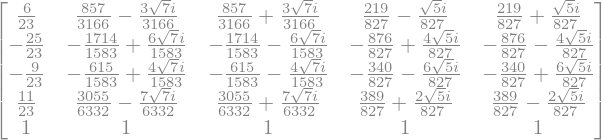

In [5]:
P = sp.Matrix([[res[i][2][0] for i in range(5)]])
P

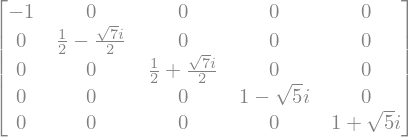

In [6]:
(P.inv()@M@P).applyfunc(sp.radsimp).applyfunc(sp.simplify)

**Question 3**

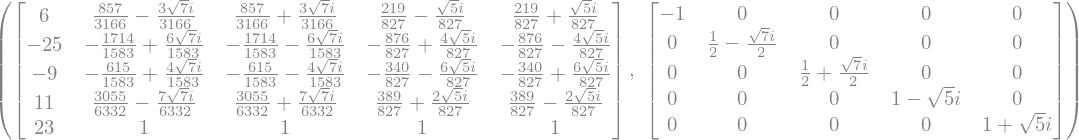

In [7]:
M.diagonalize()

## Exercice (suite)

On cherche à trouver une matrice réelle *simple* semblable à $M$.
1. *Première méthode.* En regroupant les vecteurs propres conjugués deux à deux, trouver une matrice de changement de bases permettant de résoudre le problème.
1. *Deuxième méthode.* 
    1. Montrer qu'en toute généralité, si $A$ et $B$ sont deux matrices *réelles* $n\times n $, alors
$$\left[\exists P\in\mathrm{GL}_n(\mathbb{C}),\; P^{-1}\cdot A\cdot P=B\right]\iff\left[\exists P\in\mathrm{GL}_n(\mathbb{R}),\; P^{-1}\cdot A\cdot P=B\right]$$
    1. En déduire, pour $M$ une matrice de changement de bases permettant de résoudre le problème.

**Question 1**

On suit l'algorithme vu en cours.

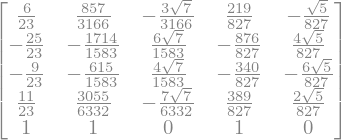

In [8]:
P1 = sp.Matrix([P[:, 0], P[:, 1].applyfunc(sp.re), P[:, 1].applyfunc(
    sp.im), P[:, 3].applyfunc(sp.re), P[:, 3].applyfunc(sp.im)]).reshape(5, 5).transpose()
P1

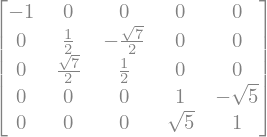

In [9]:
P1.inv()@M@P1

**Question 2.A**

1. ($\Leftarrow$) la matrice $P$ réelle convient dans $\mathrm{M}_n(\mathbb{C})$.
1. ($\Rightarrow$) Soit $P\in\mathrm{GL}_n(\mathbb{C})$ telle que
$$P^{-1}\cdot A\cdot P=B$$
En posant alors (parties réelle et imaginaire)
$$P_1=\Re(P)\quad\text{et}\quad P_2=\Im(P)$$
on a les relations, puisque $A$ et $B$ sont réelles
$$A\cdot P_1=P_1\cdot B\quad\text{et}\quad A\cdot P_2=P_2\cdot B$$
La fonction $\lambda\longmapsto \det(P_1+\lambda.P_2)$ est une fonction polynomiale non nulle (elle est non nulle pour $\lambda=i$), donc il existe des réels (et beaucoup même) tels que 
$$\det(P_1+\lambda.P_2)\ne 0 $$
et, en ce cas
$$\left(P_1+\lambda.P_2\right)^{-1}\cdot A\cdot \left(P_1+\lambda.P_2\right)=B$$

**Question 2.B**

In [10]:
P_1 = P.applyfunc(sp.re)
P_2 = P.applyfunc(sp.im)

In [11]:
P_1.det(), P_2.det()

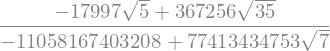

In [12]:
# Valeur 1 prise au hasard
(P_1+P_2).det()

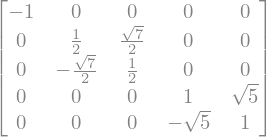

In [13]:
Q = P_1+P_2
(Q.inv()@M@Q).applyfunc(sp.radsimp).applyfunc(sp.simplify)